# Traffic Flow U.S.

### Kaggle Tabular Playground Series - Mar 2022

Forecasting twelve-hours of traffic flow in a major U.S. metropolitan area. 

- train.csv - the training set, comprising measurements of traffic congestion across 65 roadways from April through September of 1991.

        row_id - a unique identifier for this instance
        
        time - the 20-minute period in which each measurement was taken
        
        x - the east-west midpoint coordinate of the roadway
        
        y - the north-south midpoint coordinate of the roadway
        
        direction - the direction of travel of the roadway. EB indicates "eastbound" travel, for example, while SW indicates a "southwest" direction of travel.

        congestion - congestion levels for the roadway during each hour; the target. The congestion measurements have been normalized to the range 0 to 100.
    

- test.csv - the test set; you will make hourly predictions for roadways identified by a coordinate location and a direction of travel on the day of 1991-09-30.

In [135]:
import pandas as pd 
import numpy as np
import os

# graphics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# spearman 
from scipy.stats import spearmanr

# chi2
from scipy.stats import chi2_contingency

## Load the data

In [161]:
train = pd.read_csv('./data/train.csv')
del train['row_id']
train['time']= pd.to_datetime(train['time'],  format = '%Y-%m-%d %H:%M:%S') # create datatime variable
train['day'] = train.time.dt.day
train['month'] = train.time.dt.month
train['year'] = train.time.dt.year
train['hour'] = train.time.dt.hour
train['minute'] = train.time.dt.minute
# also, we think that the day of the week it is important too. So, we add it. 
train['dayofweek'] = train['time'].dt.dayofweek+1
train

,time,x,y,direction,congestion,day,month,year,hour,minute,dayofweek
0,1991-04-01 00:00:00,0,0,EB,70,1,4,1991,0,0,1
1,1991-04-01 00:00:00,0,0,NB,49,1,4,1991,0,0,1
2,1991-04-01 00:00:00,0,0,SB,24,1,4,1991,0,0,1
3,1991-04-01 00:00:00,0,1,EB,18,1,4,1991,0,0,1
4,1991-04-01 00:00:00,0,1,NB,60,1,4,1991,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
848830,1991-09-30 11:40:00,2,3,NB,54,30,9,1991,11,40,1
848831,1991-09-30 11:40:00,2,3,NE,28,30,9,1991,11,40,1
848832,1991-09-30 11:40:00,2,3,SB,68,30,9,1991,11,40,1
848833,1991-09-30 11:40:00,2,3,SW,17,30,9,1991,11,40,1


In [175]:
# we can see the direction depends of x, y and direction 
fig = px.density_contour(train, x="x", y="y", marginal_x="violin", marginal_y="violin")
fig.show()

fig = px.density_contour(train, x="x", y="y", facet_col  = 'direction')
fig.show()

#fig = px.density_heatmap(train, x="x", y="y", z="congestion", facet_col = 'direction', histfunc="avg")
#fig.show()

# so, we generate a new variable 

train['roadway'] = train.x.astype(str) + '-' + train.y.astype(str) + '-' + train.direction

print('Now, we have ', len(train.roadway.unique()), 'directions.')

Now, we have  65 directions.


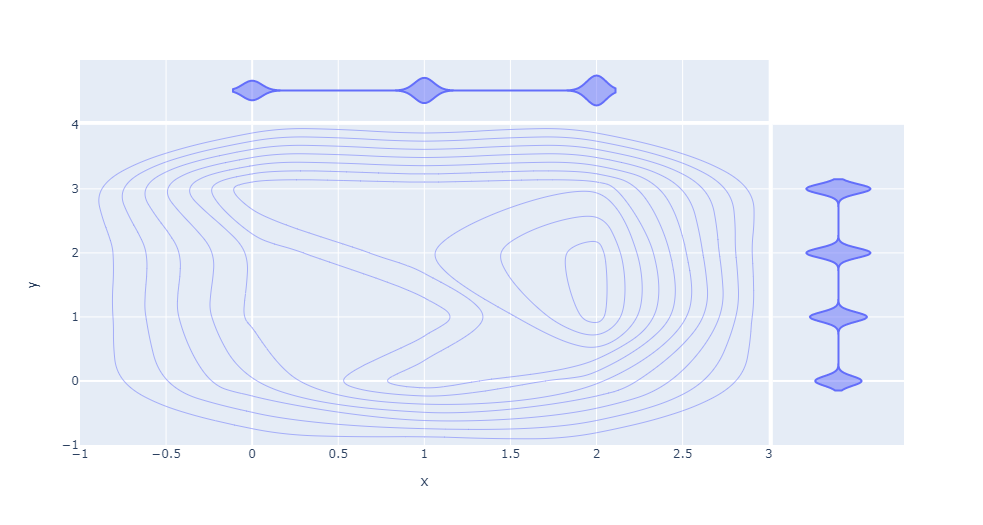


## Analize the data

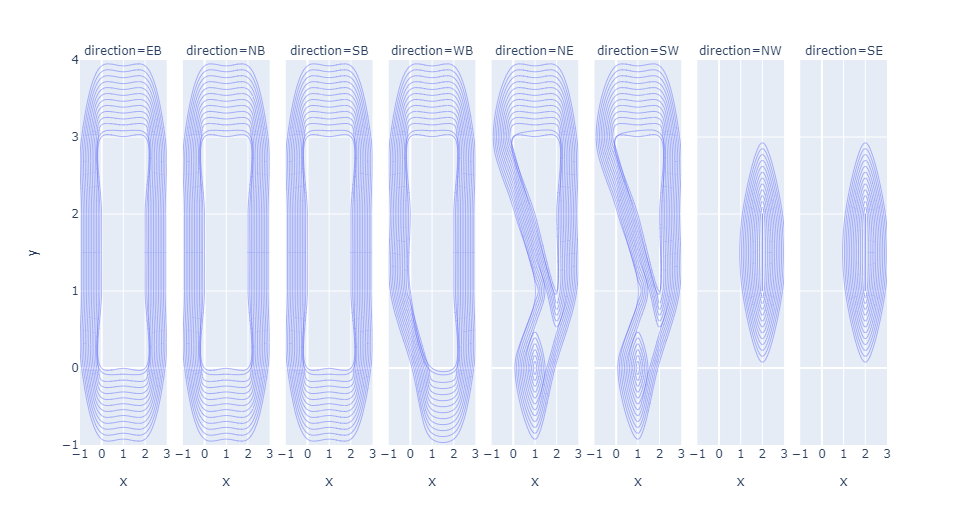

First, we are going to visualize some variables. Second, we are going to apply tests to analyze the variables and determine their distributions. 

1) Test Univariante

2) Test Bivariante

3) Conclusions

In [163]:
display(train.describe().round(3).style.format('{:,.2f}').bar(color='#6879', axis=1, vmax=200).set_caption("Statistics of numeric columns"))

,x,y,congestion,day,month,year,hour,minute,dayofweek
count,"848,835.00","848,835.00","848,835.00","848,835.00","848,835.00","848,835.00","848,835.00","848,835.00","848,835.00"
mean,1.14,1.63,47.81,15.70,6.49,"1,991.00",11.48,20.01,3.99
std,0.80,1.09,16.80,8.79,1.70,0.00,6.93,16.33,2.01
min,0.00,0.00,0.00,1.00,4.00,"1,991.00",0.00,0.00,1.00
25%,0.00,1.00,35.00,8.00,5.00,"1,991.00",5.00,0.00,2.00
50%,1.00,2.00,47.00,16.00,6.00,"1,991.00",11.00,20.00,4.00
75%,2.00,3.00,60.00,23.00,8.00,"1,991.00",17.00,40.00,6.00
max,2.00,3.00,100.00,31.00,9.00,"1,991.00",23.00,40.00,7.00


In [164]:
display(pd.DataFrame(train.groupby(['direction']).mean()['congestion']).round(3).style.format('{:,.2f}').bar(color='#4257', axis=0).set_caption("Congestion Mean - direction"))

display(pd.DataFrame(train.groupby(['x']).mean()['congestion']).round(3).style.format('{:,.2f}').bar(color='#4257', axis=0).set_caption("Congestion Mean - x"))

display(pd.DataFrame(train.groupby(['y']).mean()['congestion']).round(3).style.format('{:,.2f}').bar(color='#4257', axis=0).set_caption("Congestion Mean - y"))

#display(pd.DataFrame(train.groupby(['roadway']).mean()['congestion']).round(3).style.format('{:,.2f}').bar(color='#4257', axis=0).set_caption("Congestion Mean - roadway"))


,congestion
direction,
EB,49.57
NB,51.85
NE,39.97
NW,27.19
SB,53.72
SE,34.86
SW,42.02
WB,49.84


,congestion
x,
0,44.69
1,50.66
2,47.45


,congestion
y,
0,50.87
1,45.62
2,51.33
3,44.05


### 1) Test Univariante

In [ ]:
fig = px.histogram(train, x="congestion",
                  title='Histogram of congestion',
                   labels={'total_bill':'total bill'}, # can specify one label per df column
                   opacity=0.8,
                   color_discrete_sequence=['coral'],
                  template = 'plotly_white') # color of histogram bars)
fig.show()

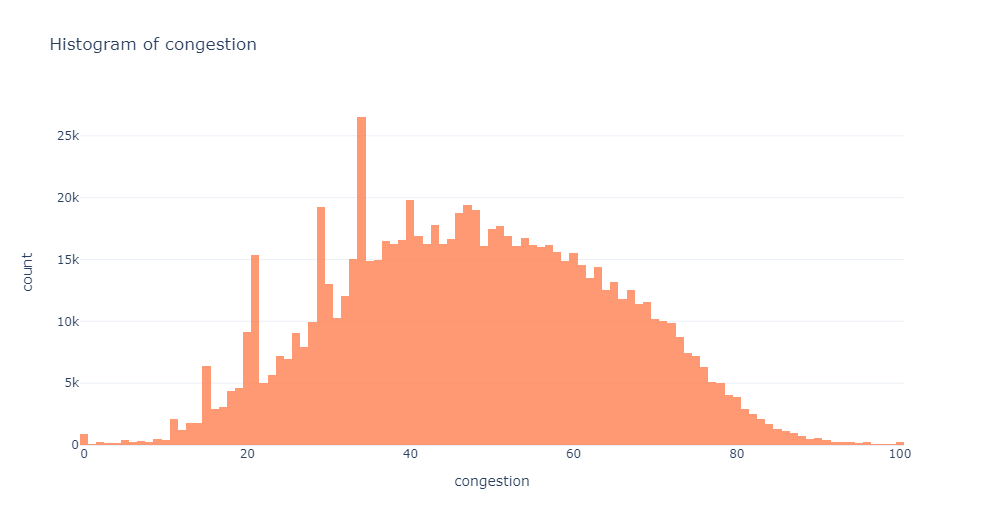

### 2) Bivariante

In [176]:
fig = px.violin(train, color = 'direction', x = 'direction', y = 'congestion',   box=True, color_discrete_sequence=px.colors.qualitative.T10)
fig.show()
#['South Bound', 'North Bound', 'East Bound', 'West Bound', 'Southwest', 'Northeast', 'Southeast', 'Northwest']

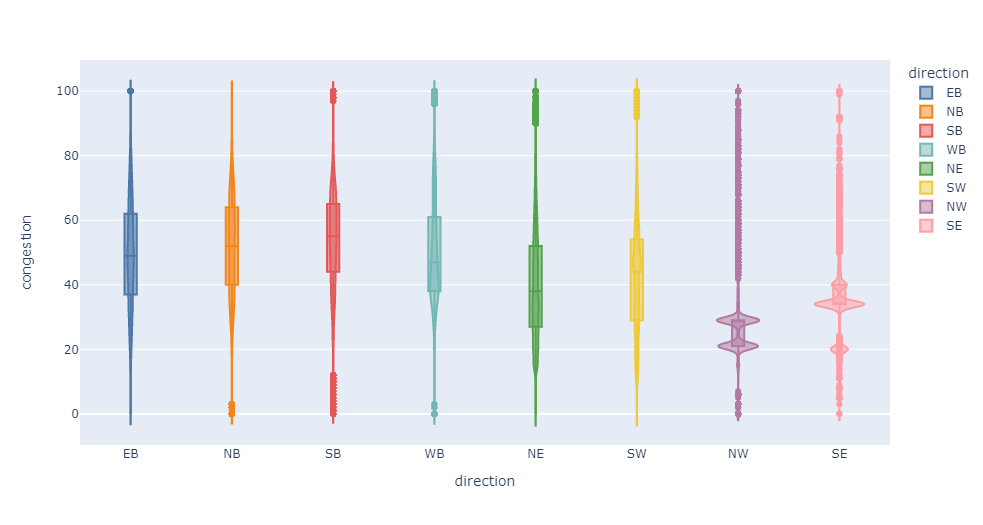

In [177]:
### bi---

fig = px.line(train.groupby(['minute']).mean(), x=train.groupby(['minute']).mean().index, y="congestion", 
              title="Avg congestion per minute and direction",
            template = 'plotly_white',
            color_discrete_sequence=['coral'])
fig.show()

fig = px.line(train.groupby(['hour']).mean(), x=train.groupby(['hour']).mean().index, y="congestion",
             title="Avg congestion per hour",
            template = 'plotly_white',color_discrete_sequence=['coral'])
fig.show()

fig = px.line(train.groupby(['day']).mean(), x=train.groupby(['day']).mean().index, y="congestion", 
              title="Avg congestion per day",
            template = 'plotly_white',
            color_discrete_sequence=['coral'])
fig.show()

fig = px.line(train.groupby(['month']).mean(), x=train.groupby(['month']).mean().index, y="congestion", 
              title="Avg congestion per month",
            template = 'plotly_white',
            color_discrete_sequence=['coral'])
fig.show()

fig = px.line(train.groupby(['dayofweek']).mean(), x=train.groupby(['dayofweek']).mean().index, y="congestion",
             title="Avg congestion per day of week",
            template = 'plotly_white',color_discrete_sequence=['coral'])
fig.show()

### tri--


fig = px.bar(train.groupby(['minute','direction']).mean().reset_index(level=[0,1]), x='minute', y="congestion", 
             color = 'direction', title="Avg congestion per minute and direction",
            template = 'plotly_white',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

fig = px.bar(train.groupby(['hour','direction']).mean().reset_index(level=[0,1]), x='hour', y="congestion", 
             color = 'direction', title="Avg congestion per hour and direction",
            template = 'plotly_white',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

fig = px.bar(train.groupby(['day','direction']).mean().reset_index(level=[0,1]), x='day', y="congestion", 
             color = 'direction', title="Avg congestion per day and direction",
            template = 'plotly_white',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

fig = px.bar(train.groupby(['month','direction']).mean().reset_index(level=[0,1]), x='month', y="congestion", 
             color = 'direction', title="Avg congestion per month and direction",
            template = 'plotly_white',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()

fig = px.bar(train.groupby(['dayofweek', 'direction']).mean().reset_index(level=[0,1]), x='dayofweek', y="congestion", 
             color = 'direction', title="Avg congestion per day of week and direction",
            template = 'plotly_white',
            color_discrete_sequence=px.colors.qualitative.T10)
fig.show()


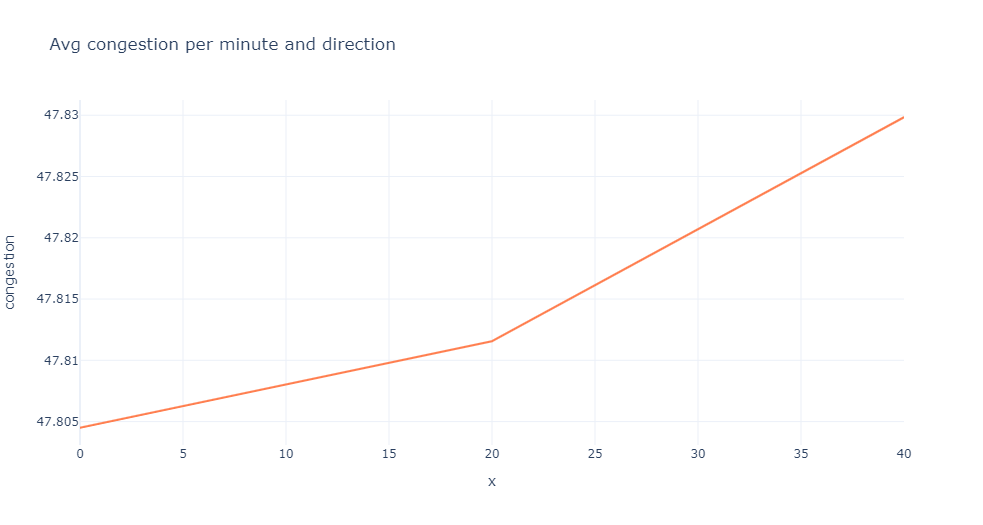

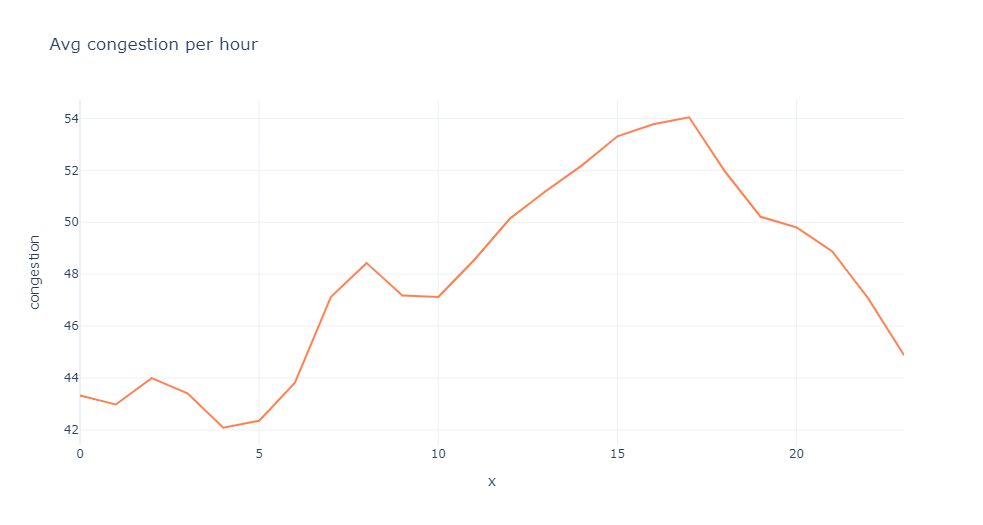

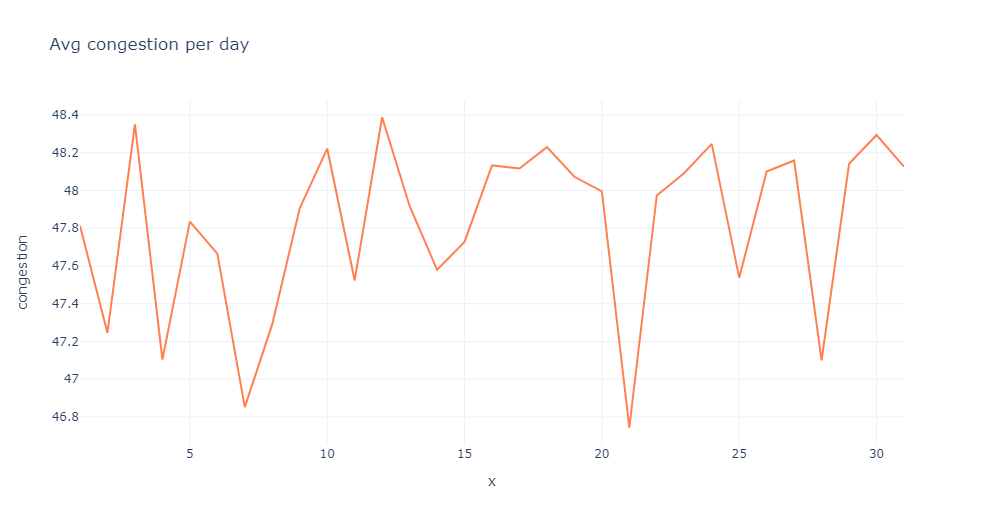

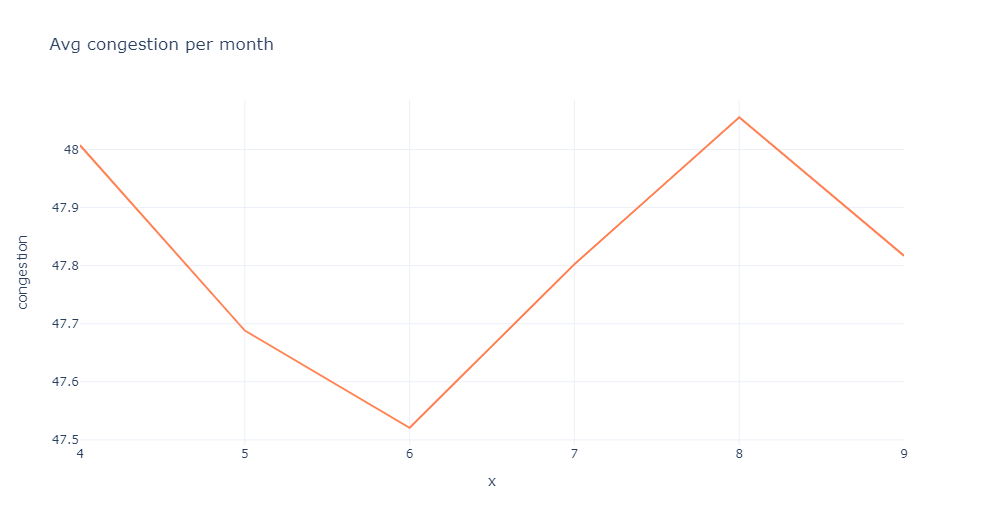

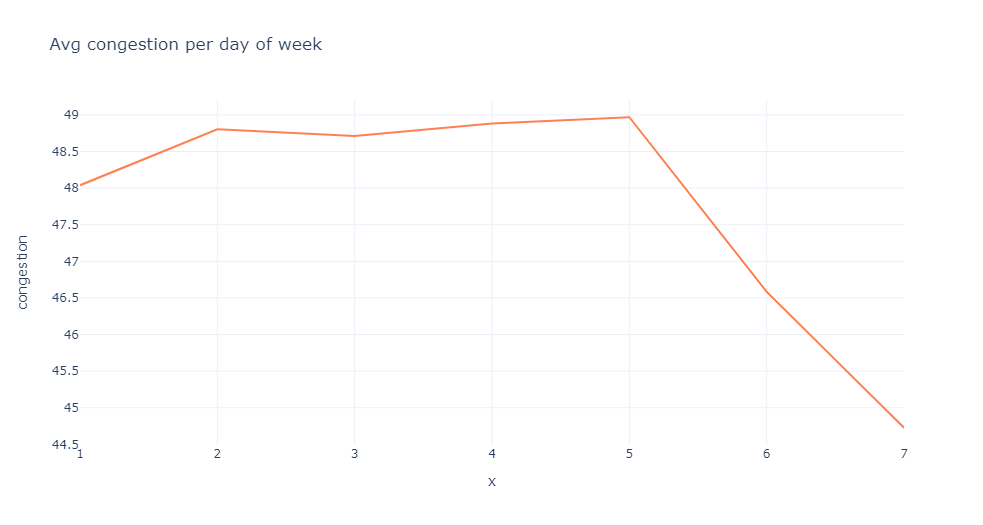

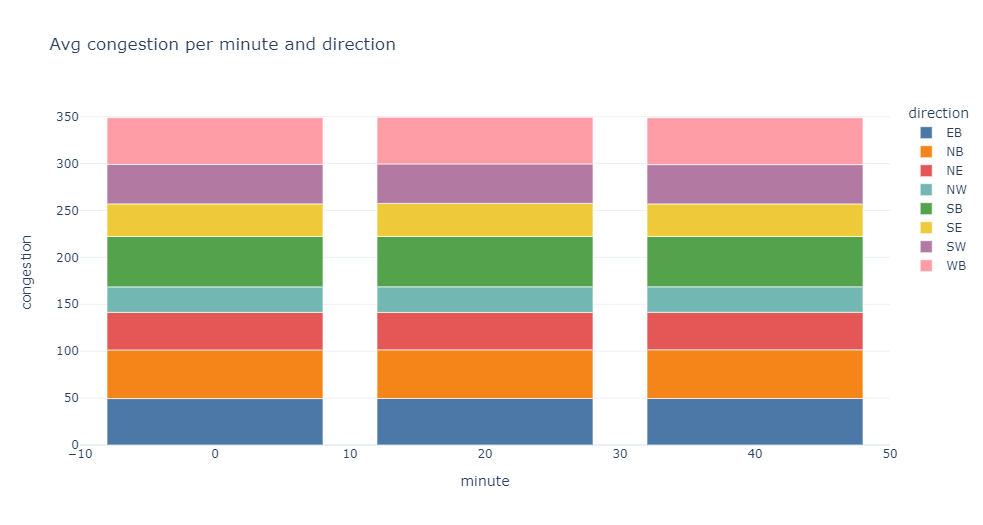

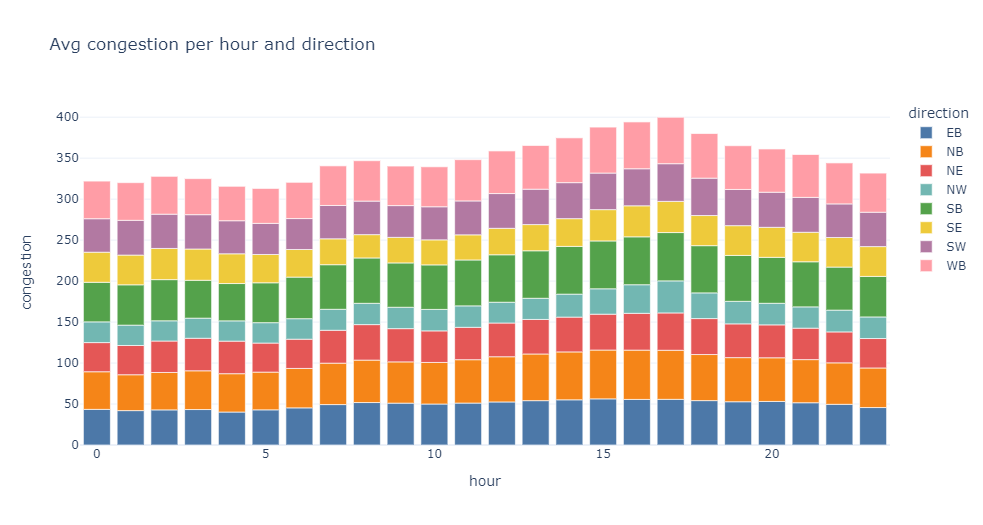

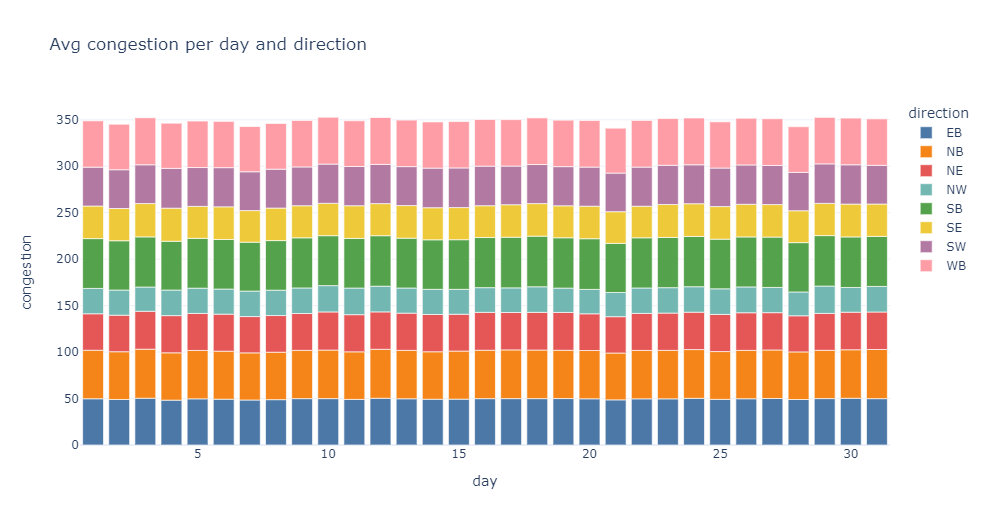

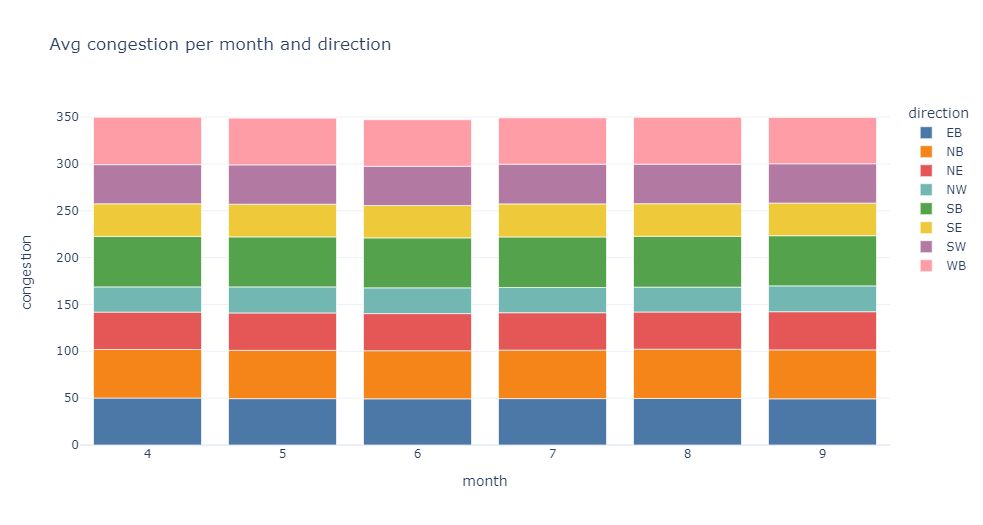

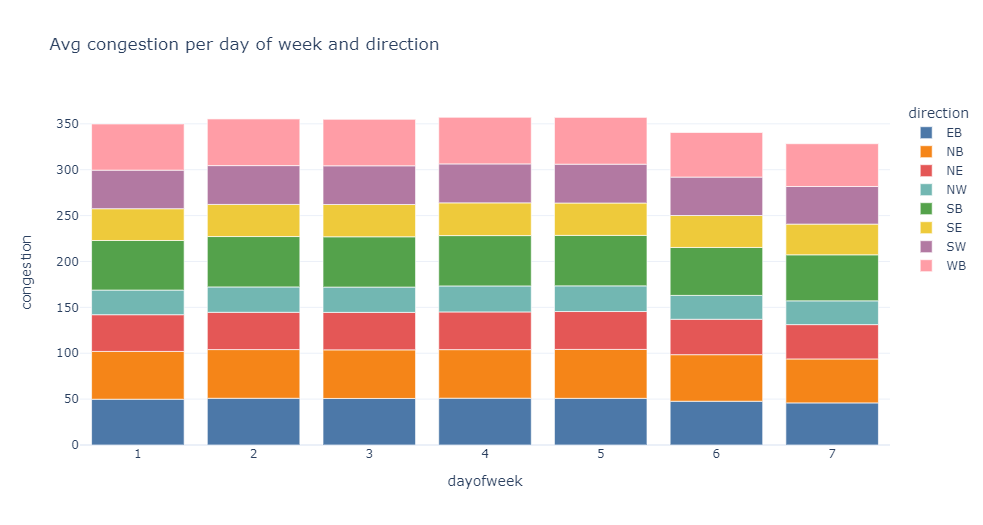

## Hypothesis test

### Numerical with numercial: Spearman test
### Numercial with categorical:  $\chi2$

### Spearmanr test

The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two variables. This one varies between -1 and +1 with 0 implying no correlation.

In [168]:
def spearmantest(x,y):
    sp, p = spearmanr(x,y)

    if p < 0.05:
        print('Se rechaza la hipótesis nula (tienen relación)', p)
        print('Valor chi cuadrado', sp)
    else:
        print('No se puede rechazar la hipótesis nula (son independientes)', p)
        print('Valor chi cuadrado', sp)
        
# between class and variables 

numcolumns = ['day', 'hour', 'month', 'minute', 'dayofweek']

for i in numcolumns:
    print('\n',i)
    print(spearmantest(train['congestion'], train[i]))


 day
Se rechaza la hipótesis nula (tienen relación) 7.845236249987824e-11
Valor chi cuadrado 0.007058839411322412
None

 hour
Se rechaza la hipótesis nula (tienen relación) 0.0
Valor chi cuadrado 0.14647176314076338
None

 month
No se puede rechazar la hipótesis nula (son independientes) 0.06633877572015429
Valor chi cuadrado 0.001992927253580943
None

 minute
No se puede rechazar la hipótesis nula (son independientes) 0.6643837369384717
Valor chi cuadrado 0.0004709202544108496
None

 dayofweek
Se rechaza la hipótesis nula (tienen relación) 0.0
Valor chi cuadrado -0.05882410074761724
None


In [169]:
# between class and variables with sample of 8000

sample = train.sample(4000)
numcolumns = ['day', 'hour', 'month', 'minute', 'dayofweek']

for i in numcolumns:
    print('\n',i)
    print(spearmantest(sample['congestion'], sample[i]))


 day
No se puede rechazar la hipótesis nula (son independientes) 0.8813965090330099
Valor chi cuadrado -0.002359779580164017
None

 hour
Se rechaza la hipótesis nula (tienen relación) 2.566508215386777e-22
Valor chi cuadrado 0.1527751711644973
None

 month
No se puede rechazar la hipótesis nula (son independientes) 0.15005945483988886
Valor chi cuadrado 0.02276183697677044
None

 minute
Se rechaza la hipótesis nula (tienen relación) 0.03043965369446585
Valor chi cuadrado 0.034221606813195235
None

 dayofweek
Se rechaza la hipótesis nula (tienen relación) 0.002171070699796335
Valor chi cuadrado -0.04846081554385344
None


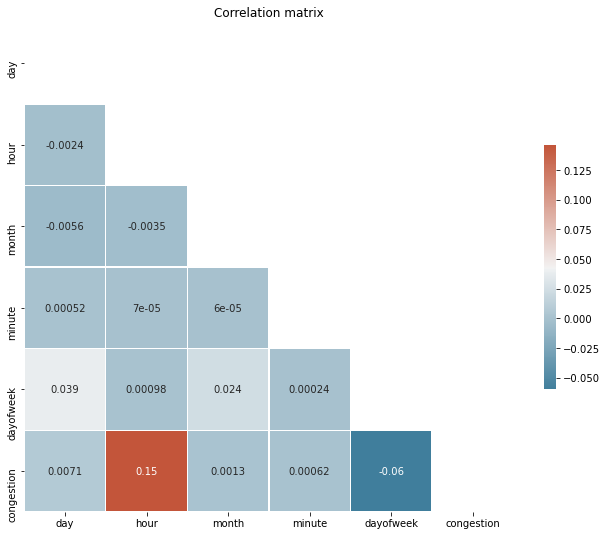

In [171]:
# between all numeric variables 

cormat = train[['day', 'hour', 'month', 'minute', 'dayofweek', 'congestion']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cormat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cormat, mask=mask, cmap=cmap, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix')
plt.show()

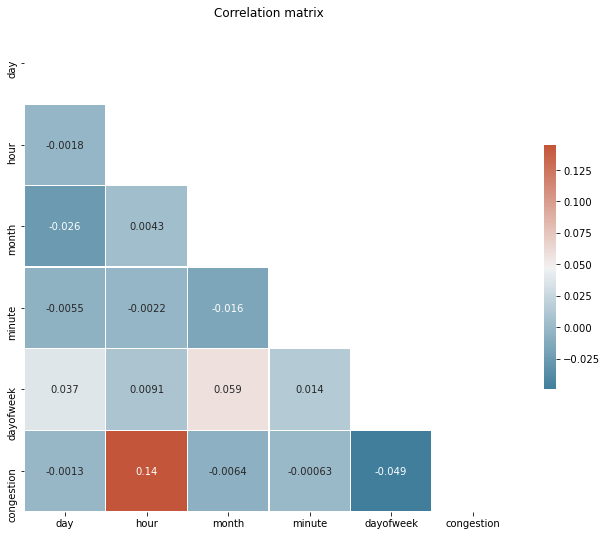

In [172]:
# between all numeric variables with sample of 8000

cormat = train[['day', 'hour', 'month', 'minute', 'dayofweek', 'congestion']].sample(8000).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cormat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cormat, mask=mask, cmap=cmap, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix')
plt.show()

# $\chi^2$ 

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X.


In [173]:
def chi(crosstab):
    chi2, p, dof, ex = chi2_contingency(crosstab)

    if p < 0.05:
        print('Se rechaza la hipótesis nula (tienen relación)', p)
        print('Valor chi cuadrado', chi2)
    else:
        print('No se puede rechazar la hipótesis nula (son independientes)', p)
        print('Valor chi cuadrado', chi2)
        
print('Roadway')
crosstab_road = pd.crosstab(index=train['roadway'], columns = train['congestion'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

print('\nDirection')
crosstab_road = pd.crosstab(index=train['direction'], columns = train['congestion'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

print('\nRoadway and Direction')
crosstab_road = pd.crosstab(index=train['direction'], columns = train['roadway'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

Roadway
Se rechaza la hipótesis nula (tienen relación) 0.0
Valor chi cuadrado 2552170.467671097

Direction
Se rechaza la hipótesis nula (tienen relación) 0.0
Valor chi cuadrado 755984.2413253047

Roadway and Direction
Se rechaza la hipótesis nula (tienen relación) 0.0
Valor chi cuadrado 5941845.0


In [174]:
# repeat with group of 300 samples to avoid the p-value effect.  

sample = train.sample(300)

print('Roadway')
crosstab_road = pd.crosstab(index=sample['roadway'], columns = sample['congestion'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

print('\nDirection')
crosstab_road = pd.crosstab(index=sample['direction'], columns = sample['congestion'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

print('\nRoadway and Direction')
crosstab_road = pd.crosstab(index=sample['direction'], columns = sample['roadway'])
road_frec = crosstab_road / crosstab_road.sum().sum()
chi2_contingency(crosstab_road)
chi(crosstab_road)

Roadway
Se rechaza la hipótesis nula (tienen relación) 7.099391350242052e-13
Valor chi cuadrado 4770.134954992098

Direction
Se rechaza la hipótesis nula (tienen relación) 1.611787717018056e-07
Valor chi cuadrado 618.0351494925234

Roadway and Direction
Se rechaza la hipótesis nula (tienen relación) 2.641378758451943e-211
Valor chi cuadrado 2100.0


## Conclusions

We are interested in the variables correlated with the class to be predicted. As can be seen, the variable with the highest correlation corresponds to the hour, followed by the week day. The variables Roadway and Direction are both related to the class, with roadway being more important. As there is a relationship between them, we will keep Roadway.  

Also, we think that it could be a good idea add the days with national celebration.